# **Question One - Part 2**


In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')
# pi and exp
pi=np.pi
exp=np.e
# file read & splitting the sheets into two different tables
filename=("/content/gdrive/MyDrive/Asssignment4_Data.xlsx")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from statistics import mode
from six import StringIO
from IPython.display import Image  
import pydotplus

sheetnames = ['Train', 'Test']
df_train= pd.read_excel(filename, sheet_name = sheetnames[0])
df_test= pd.read_excel(filename, sheet_name = sheetnames[1])
sheet=[df_train, df_test]

# Classifying (splitting) the items in the training set based on the Construction Type
# 1: Apartment; 2: House; 3: Condo
item1=[] 
item2=[]
item3=[]

for idx, itm in enumerate (sheet[0].columns[1:-1]):
  item1.append(sheet[0][sheet[0][sheet[0].columns[-1]]=="Apartment"][itm])
  item2.append(sheet[0][sheet[0][sheet[0].columns[-1]]=="House"][itm])
  item3.append(sheet[0][sheet[0][sheet[0].columns[-1]]=="Condo"][itm])

# I need to calculate the Mean and Standard Deviation to, by using the formula, calculate the conditional probabilities.
# 1: Apartment; 2: House; 3: Condo
mean1=[]
mean2=[]
mean3=[]
std1=[]
std2=[]
std3=[]

# Here, I calculated the mean and std of EACH FEATURE and based on the class they belong to, I appended them to their category!
# So, the length of each is equal to the number of features.
for itm in range(len(item1)):
  mean1.append(item1[itm].mean())
  mean2.append(item2[itm].mean())
  mean3.append(item3[itm].mean())

  std1.append(item1[itm].std())
  std2.append(item2[itm].std())
  std3.append(item3[itm].std())

# Here, I calculated the probability of each class.
counter1=0
counter2=0
counter3=0
for idx, itm in enumerate (sheet[0][sheet[0].columns[-1]]):
  if itm=="Apartment":
    counter1+=1
  if itm=="House":
    counter2+=1
  if itm=="Condo":
    counter3+=1

total=len(sheet[0][sheet[0].columns[-1]])
class1=counter1/total
class2=counter2/total
class3=counter3/total

df_train

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [122]:
df_test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [123]:
conprob1=[]
conprob2=[]
conprob3=[]
# Conditional Probabilities are calculated here!
# I coded it with two FOR loops to make it more understandable
for irow in range(len(sheet[1][sheet[1].columns[-1]])):
  for icol in range (len((sheet[1].columns[1:-1]))):
    itm=(sheet[1][sheet[1].columns[icol+1]][irow]) #column+1: since first column (zero) was about House ID, something useless here for me.

    if (icol==0): #APPEND
      conprob1.append([(1/(std1[icol]*((2*pi)**0.5)))*(exp**(-0.5*((itm-mean1[icol])/std1[icol])**2))]) 
      conprob2.append([(1/(std2[icol]*((2*pi)**0.5)))*(exp**(-0.5*((itm-mean2[icol])/std2[icol])**2))])
      conprob3.append([(1/(std3[icol]*((2*pi)**0.5)))*(exp**(-0.5*((itm-mean3[icol])/std3[icol])**2))])

    else: #EXTEND, to make it beautiful enough! :)
      conprob1[irow].extend([(1/(std1[icol]*((2*pi)**0.5)))*(exp**(-0.5*((itm-mean1[icol])/std1[icol])**2))])
      conprob2[irow].extend([(1/(std2[icol]*((2*pi)**0.5)))*(exp**(-0.5*((itm-mean2[icol])/std2[icol])**2))])
      conprob3[irow].extend([(1/(std3[icol]*((2*pi)**0.5)))*(exp**(-0.5*((itm-mean3[icol])/std3[icol])**2))]) 


probs1=[] # just for my-own goal, otherwise, the probs_comp is enough, since it collects all three probabillities to compare! :) MAP!
probs2=[]
probs3=[]
probs_comp=[]
for irow in range(len(sheet[1][sheet[1].columns[-1]])):
  probs1.append(np.prod(conprob1[irow])*class1)
  probs_comp.append([np.prod(conprob1[irow])*class1])
  probs2.append(np.prod(conprob2[irow])*class2)
  probs_comp[irow].extend([np.prod(conprob2[irow])*class2])
  probs3.append(np.prod(conprob3[irow])*class3)
  probs_comp[irow].extend([np.prod(conprob3[irow])*class3])


for num, element  in enumerate (probs_comp):
  index=(element).index(max(element))+1 # first element-> index=0
  
  if (index==1):
    category="APARTMENT"
  elif (index==2):
    category="HOUSE"
  elif (index==3):
    category="CONDO"
  else:
    print("something is Wrong!")

  print("\n",num+1,". Maximum Probabity is:",max(element),"which means the EXAMPLE belongs to the",index,"th category, i.e",category)
print("\n")
#now construct a beautiful table :)
pd.DataFrame(probs_comp, columns=['1st Category Belonging Probability','2nd Category Belonging Probability','3rd Category Belonging Probability'])


 1 . Maximum Probabity is: 2.278334632052676e-05 which means the EXAMPLE belongs to the 2 th category, i.e HOUSE

 2 . Maximum Probabity is: 4.855709005221053e-07 which means the EXAMPLE belongs to the 1 th category, i.e APARTMENT

 3 . Maximum Probabity is: 6.402867269745935e-08 which means the EXAMPLE belongs to the 1 th category, i.e APARTMENT

 4 . Maximum Probabity is: 1.1475454140521525e-06 which means the EXAMPLE belongs to the 1 th category, i.e APARTMENT

 5 . Maximum Probabity is: 4.305093225532239e-07 which means the EXAMPLE belongs to the 3 th category, i.e CONDO




,1st Category Belonging Probability,2nd Category Belonging Probability,3rd Category Belonging Probability
0,1.982147e-06,2.278335e-05,1.711734e-06
1,4.855709e-07,4.480077e-13,2.679117e-07
2,6.402867e-08,1.388113e-09,2.456670e-08
3,1.147545e-06,1.040199e-15,1.008087e-06
4,4.074291e-07,1.978253e-31,4.305093e-07


# **Question Two**

##Part One:
1. Use the default parameters.
a. What is the accuracy on the training set? b. What is the accuracy on the test set?

Accuracy on the training set is 100% in the default mode.
Accuracy on the test set is 40% in the default mode.

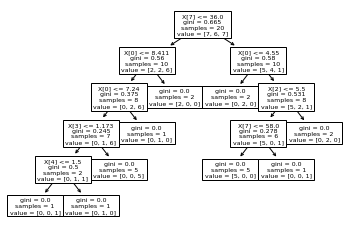


 Training Accuracy is 100.0  


 Test Accuracy is 40.0  



In [124]:
# Training Decision Tree
x_train = sheet[0][sheet[0].columns[1:-1]]
y_train = sheet[0][sheet[0].columns[-1]]
x_test = sheet[1][sheet[1].columns[1:-1]]
y_test = sheet[1][sheet[1].columns[-1]]

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_train_pred=clf.predict(x_train)
tree.plot_tree(clf)
plt.show()

print("\n\033[1;3m Training Accuracy is",accuracy_score(y_train,y_train_pred)*100 ,'\033[0m',"\n")
y_test_pred = clf.predict(x_test) 
print("\n\033[1;3m Test Accuracy is",accuracy_score(y_test,y_test_pred)*100 ,'\033[0m',"\n")




# Part 2:
2. What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value.

I have obtained the decision tree for different magnitudes of the Maximum Depth. In the next steps, the plot of each three with scores of training and test set are determined. At last, I plotted the diagram to make it more understandable.
I realized that, when I control only the Max_Depth, the training accuracy improves till Maximum Depth= 5 where Accuracy=100%. After that, adding more depth does not have any effect on the tree! I also noticed that, by changing the depth from 2 to 3, the test score drops from 80% to 40% and remains there for the other depth magnitudes.

Since the size of training and trst set is really small, it is hard to say what is the best value. Baused on the plot though, I would go for the Max Depth=2, and if I have another chance, I will definitely go for the value=5, since nothing is changing after it, and its the best performance on the training set while nothing on the test set is changed, but we have the best performance of the test set on the max depth of 2. However, since the size of the data sets are really small, it is hard to consider a strict answer.


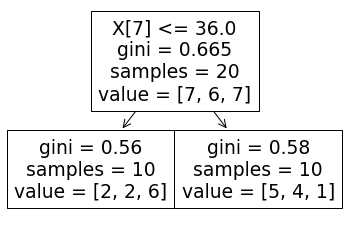

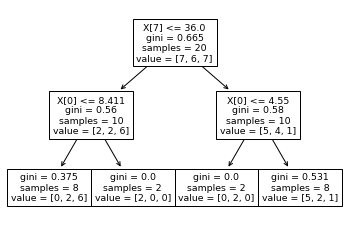

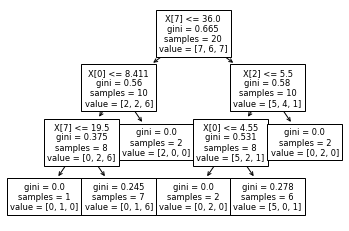

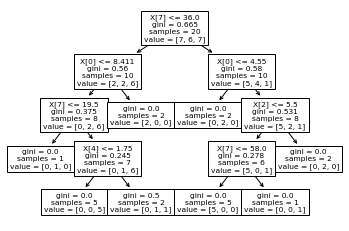

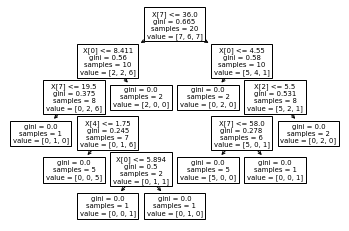

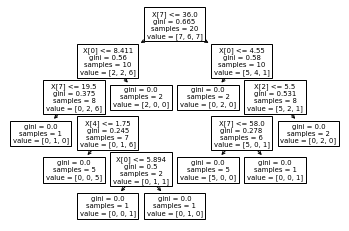

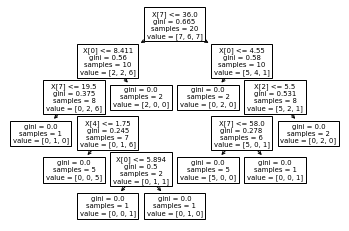

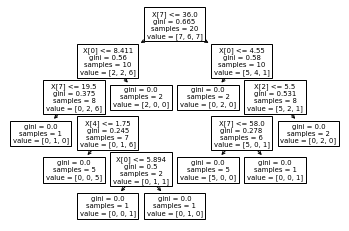

In [125]:
# Training Decision Tree
x_train = sheet[0][sheet[0].columns[1:-1]]
y_train = sheet[0][sheet[0].columns[-1]]

for i in range (1,9):
  clf = DecisionTreeClassifier(max_depth=i, random_state=0)
  clf.fit(x_train, y_train)
  tree.plot_tree(clf)
  plt.show()

In [126]:
# Trainnig Set
Train_Score=[]
for i in range (1,9):
  clf = DecisionTreeClassifier(max_depth=i, random_state=0)
  clf.fit(x_train, y_train)
  y_train_pred=clf.predict(x_train)
  Trains=[]
  for idx, itm in enumerate (y_train_pred):
    Trains.append([itm])
    Trains[idx].extend([y_train[idx]])
  
  Train_Score.append(accuracy_score(y_train,y_train_pred)*100)

  # Comparing the predicted and real y_train to make sure I am proceeding in the right way! :)
  print("\n\033[1;3m Training Accuracy with Maximum Depth=",i,"is",accuracy_score(y_train,y_train_pred)*100 ,'\033[0m',"\n")
  pd.DataFrame(Trains, columns=['Predicted_y_train','Real_y_train'])


 Training Accuracy with Maximum Depth= 1 is 55.00000000000001  


 Training Accuracy with Maximum Depth= 2 is 75.0  


 Training Accuracy with Maximum Depth= 3 is 90.0  


 Training Accuracy with Maximum Depth= 4 is 95.0  


 Training Accuracy with Maximum Depth= 5 is 100.0  


 Training Accuracy with Maximum Depth= 6 is 100.0  


 Training Accuracy with Maximum Depth= 7 is 100.0  


 Training Accuracy with Maximum Depth= 8 is 100.0  




 Test Accuracy with Maximum Depth= 1 is 40.0  


 Test Accuracy with Maximum Depth= 2 is 80.0  


 Test Accuracy with Maximum Depth= 3 is 40.0  


 Test Accuracy with Maximum Depth= 4 is 40.0  


 Test Accuracy with Maximum Depth= 5 is 40.0  


 Test Accuracy with Maximum Depth= 6 is 40.0  


 Test Accuracy with Maximum Depth= 7 is 40.0  


 Test Accuracy with Maximum Depth= 8 is 40.0  





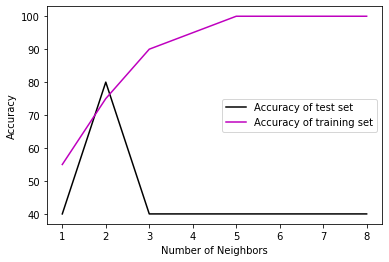

In [127]:
# To test the Decision Tree on the Test Data:
x_test=sheet[1][sheet[1].columns[1:-1]]
y_test=sheet[1][sheet[1].columns[-1]]
Test_Score=[]

for i in range (1,9):
  clf = DecisionTreeClassifier(max_depth=i, random_state=0)
  clf.fit(x_train, y_train)
  y_test_pred = clf.predict(x_test)

  # To compare the predicted and real y_test: # PRINTING ACCURACY! :)
  Tests=[]
  for idx, itm in enumerate (y_test_pred):
    Tests.append([itm])
    Tests[idx].extend([y_test[idx]])

  Test_Score.append(accuracy_score(y_test,y_test_pred)*100)
  print("\n\033[1;3m Test Accuracy with Maximum Depth=",i,"is",accuracy_score(y_test,y_test_pred)*100 ,'\033[0m',"\n")
  pd.DataFrame(Tests, columns=['Predicted_y_est','Real_y_test'])

print("\n")
# plot
plt.plot(range (1,9), Test_Score, label = 'Accuracy of test set', color="black")
plt.plot(range (1,9), Train_Score, label = 'Accuracy of training set',color="m")  
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


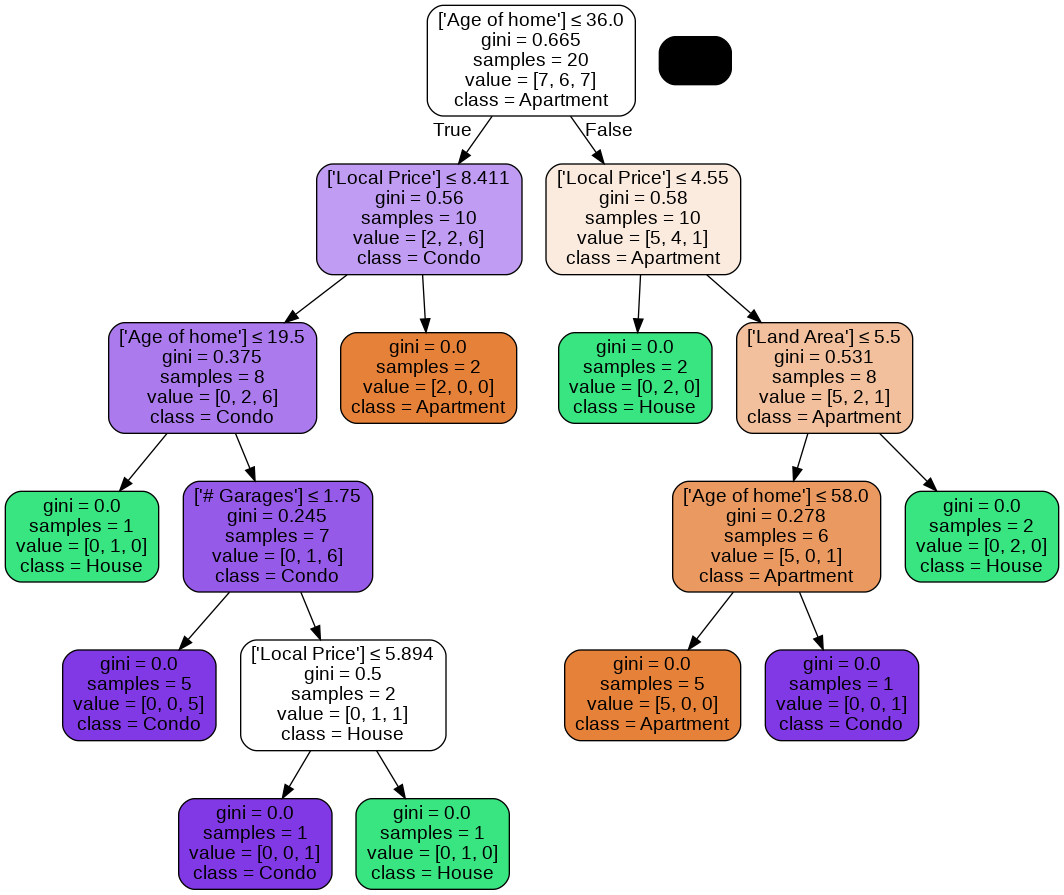

In [128]:
feature_cols=[]
for i in range(8):
  feature_cols.append([sheet[0].columns[i+1]])
feature_cols

from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Apartment','House','Condo'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Part 3:
3. Why does restricting the depth have such a strong effect on the classifier performance?
Since it is related to considering further features or not! In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting in decision trees because your model will fit perfectly for the training data and will not be able to generalize well on test set. So, if your model is overfitting, reducing the number for Max Depth is one way to avoid overfitting.

# Part 4:
4. Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace the path taken towards classification) and provide a classification for the following
example:

{Local Price:9.0384,
Bathrooms:1,
Land Area=7.8,
Living Area=1.5,
number of Garages=1.5,
number of Rooms=7,
number of Bedrooms=3,
Age of Home=23}

**My Answer: Hand-Written!**

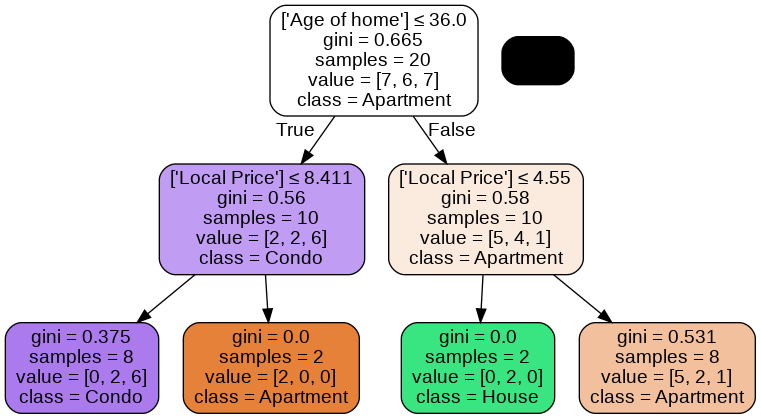

In [129]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0) #with Max_Depth=2
clf.fit(x_train, y_train)
# tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Apartment','House','Condo'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

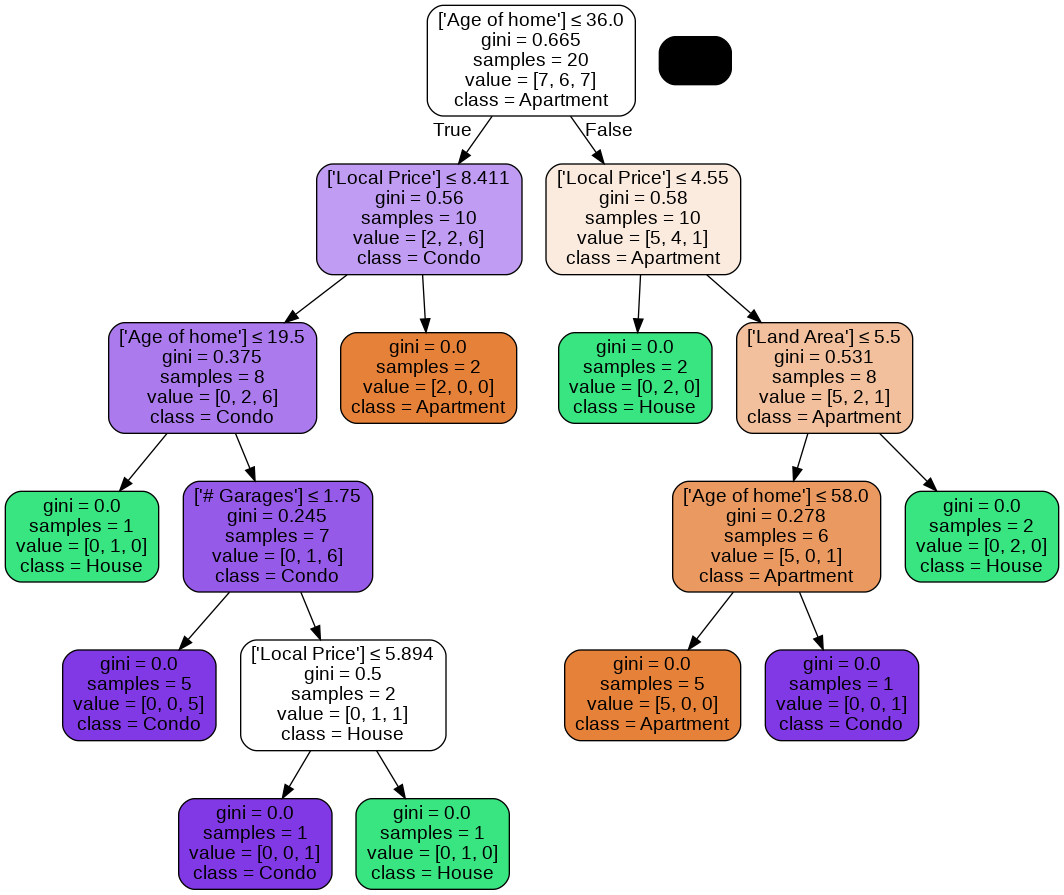

In [130]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0) #with Max_Depth=5
clf.fit(x_train, y_train)
# tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Apartment','House','Condo'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# **Question Three**

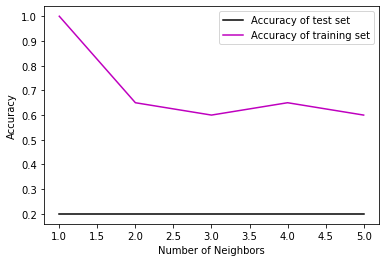

In [131]:
test_predict=[]
neighbors = np.arange(1,6)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

def eucledian(d1,d2):#Euclidean Dist
    dist=(np.sum((d1-d2)**2))**0.5
    return dist
def KNeighborClassifier(x_train, y_train , x_test, KNN):
    cats = []
    for itm in x_test: 
        pnt_dist = []       
        for count in range(len(x_train)): #training Data
            dist1 = eucledian(np.array(x_train[count,:]) , itm) 
            pnt_dist.append(dist1) 

        dist = np.argsort(np.array(pnt_dist))[:KNN] 
        labels = y_train[dist]
        labs = mode(labels) 

        labs = labs.mode[0]
        cats.append(labs)
    return cats 
# Loop over K values
for idx, itm in enumerate(neighbors):
    test_predict.append([])
    knn = KNeighborsClassifier(n_neighbors=itm)
    knn.fit(x_train, y_train)
    y_test_predict=list(knn.predict(x_test))
    test_predict[idx].extend(y_test_predict)
      
    # Compute training and test data accuracy
    train_accuracy[idx] = knn.score(x_train, y_train)
    test_accuracy[idx] = knn.score(x_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Accuracy of test set', color="black")
plt.plot(neighbors, train_accuracy, label = 'Accuracy of training set',color="m")
  
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

test_predict_transposed = list(zip(*test_predict))

In [132]:
pd.DataFrame(test_predict_transposed, columns=["K=1","K=2","K=3","K=4","K=5"], index=["1st test sample","2nd test sample",
                                                                                            "3rd test sample","4th test sample","5th test sample"])

,K=1,K=2,K=3,K=4,K=5
1st test sample,Apartment,Apartment,Apartment,Apartment,Apartment
2nd test sample,Apartment,Apartment,Apartment,Apartment,Apartment
3rd test sample,Apartment,Apartment,Apartment,Apartment,Apartment
4th test sample,Condo,Condo,House,House,House
5th test sample,House,Condo,House,House,House


I have plotted the diagram for the accuracy of the traning and test set. Also, to obtian a deeper insight, I provided the above table, shows the prediction (the category) of each sample in the test set with different magnitudes of K nearest neighbors. As shown above, the first three sample are belong to a similar category, no matter what the value of K is. However, for the last two examples in the test set, K has an impact of the category they are assigned to.
